## Titanic task

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline
#import split
from sklearn.model_selection import train_test_split
#import regression 
from sklearn.linear_model import LogisticRegression
#import Random forest
from sklearn.ensemble import RandomForestClassifier
#liner regression
from sklearn.linear_model import LinearRegression
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
#read the datasets named gender.csv ,train.csv and test.csv
gender=pd.read_csv('gender.csv')
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
#check the head of each  dataset
print(gender.head())
print(train.head())
print(test.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  S

In [4]:
#check the info of each dataset
gender.info()
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtype

In [5]:
#chek the null values
gender.isnull().sum()
train.isnull().sum()    
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
#remove the null values
train.dropna(inplace=True)
test.dropna(inplace=True)
gender.dropna(inplace=True) 

In [7]:
#check the null values
gender.isnull().sum()
train.isnull().sum()    
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
#check the columns of each dataset
gender.columns
train.columns
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Vistalizations of the data

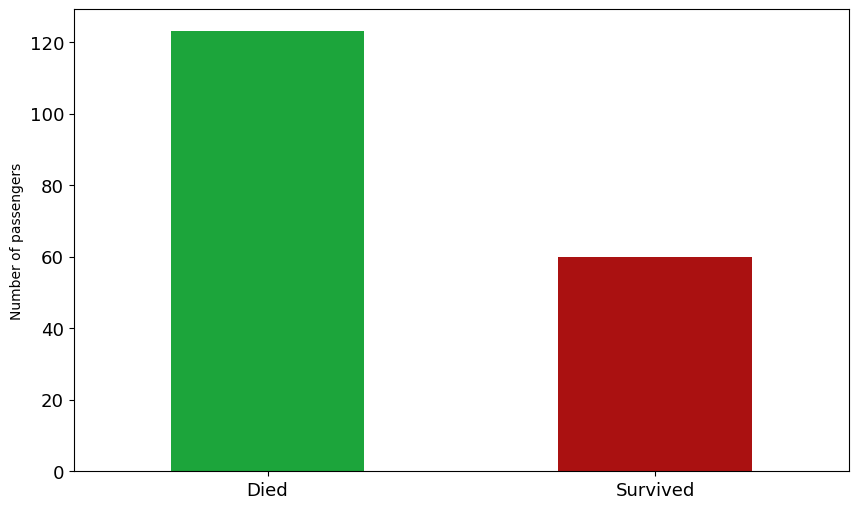

In [9]:
#use matplotlib to check the distribution between those who survived and the dead ones
ax=train['Survived'].value_counts().plot(kind='bar',figsize=(10,6),fontsize=13,color=['#1CA53B','#AA1111'])
ax.set_xticklabels(['Died','Survived'],rotation=0)
ax.set_ylabel('Number of passengers')
plt.show()

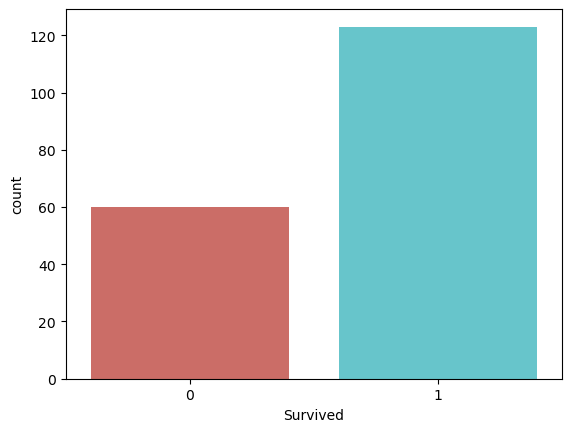

In [10]:
#use seaborn to check the distribution between those who survived and the dead ones
sns.countplot(x='Survived',data=train,palette='hls')
plt.show()
    

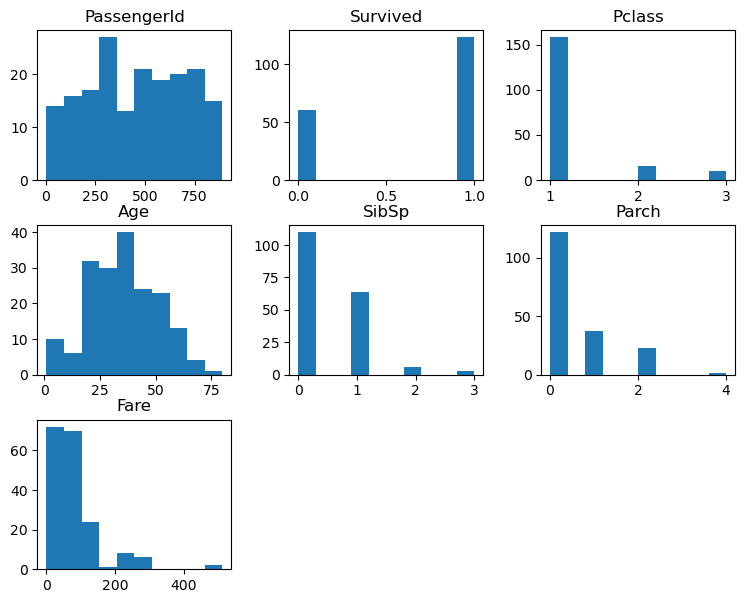

In [11]:
#use histogram to check the distribution between the dead ones and the survived ones
train.hist(bins=10,figsize=(9,7),grid=False)
plt.show()


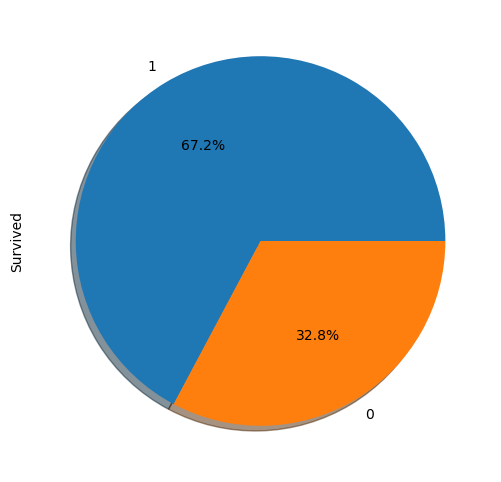

In [12]:
#use pie chart to check the distribution between the dead ones and the survived ones
train['Survived'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%1.1f%%',shadow=True)
plt.show()

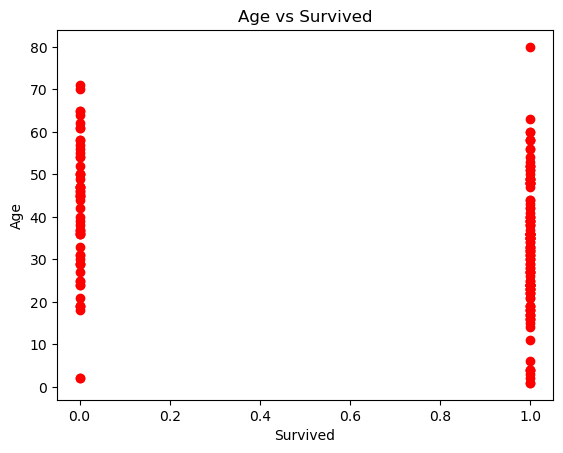

In [13]:
#use the scatter plot to check the distribution between the dead ones and the survived ones
plt.scatter(train['Survived'],train['Age'],color='red')
plt.title('Age vs Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

## machine Leaning Modeling and Prediction

In [15]:
#use the train dataset for  machine learning algorithms 
#drop the columns which are not required
train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S


In [16]:
#use the test dataset for  machine learning algorithms
#drop the columns which are not required
test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,female,23.0,1,0,82.2667,S
14,1,female,47.0,1,0,61.1750,S
24,1,female,48.0,1,3,262.3750,C
26,1,female,22.0,0,1,61.9792,C
28,1,male,41.0,0,0,30.5000,S


In [21]:
#convert non-numeric values to numeric values
train  = pd.get_dummies(train)
test  = pd.get_dummies(test)
train.head()

#split the train dataset into train and test
X_train,X_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)


In [22]:
#use the logistic regression algorithm
logmodel=LogisticRegression()   

In [23]:
#fit the model
logmodel.fit(X_train,y_train)

/home/kali/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
#check the accuracy of the model
logmodel.score(X_test,y_test)
    

0.7636363636363637

In [25]:
#use Random Forest algorithm
rfc=RandomForestClassifier(n_estimators=100)
    

In [26]:
#fit the model  
rfc.fit(X_train,y_train)
    

RandomForestClassifier()

In [27]:
#check the accuracy of the model
rfc.score(X_test,y_test)

0.6545454545454545

In [28]:
#use decision tree algorithm    
dtree=DecisionTreeClassifier()

In [29]:
#fit the model
dtree.fit(X_train,y_train)
    

DecisionTreeClassifier()

In [30]:
#check the accuracy of the model
dtree.score(X_test,y_test)

0.6727272727272727

In [31]:
#use linear regression algorithm
lm=LinearRegression()

In [32]:
#fit the model
lm.fit(X_train,y_train)

LinearRegression()

In [33]:
#chek the accuracy of the model
lm.score(X_test,y_test)

0.21608465259191456